<a id='intro'></a>
<img src='../images/logo.png'>
<br>
<br>
<br>
    
# <font color='CD9202'>Part II</font><font color='lightgray'> - </font><font color='navyblue'>ICOS obs vs STILT model output</font>
    

<br>
<br>
<br>

In this part of the webinar, we will work with two types of ICOS data products: observations of greenhouse gas concentrations and outputs from an atmospheric model called STILT. More in particular, this notebook is dedicated to accessing ICOS data and metadata for CO$_2$-concentrations measured at ICOS atmosphere stations as well as accessing simulated CO$_2$-concentrations from [STILT](https://www.icos-cp.eu/data-services/tools/stilt-footprint
) model outputs (elaborated data product). Data and metadata will be accessed using the icoscp Python library. You will get a chance to compare simulated CO$_2$-concentrations to observed CO$_2$-concentrations and assess how well the simulated values fit the real observations.

Throughout the different steps included in this notebook, you will get an impression of how ICOS deals with data provenance and get some ideas on how to utilize metadata information in data analysis processes as well as in data visualizations. 

The notebook is divided into the following parts:
- [Explore ICOS atmosphere stations](#explore_icos_as)
- [Import Python modules & ICOS tools](#import_modules)
- [Access observations](#access_st_data)
- [Plot observations](#plot_st_data)
- [Analyze observations](#data_analysis)
- [Access model output](#model_output)
- [Compare model output to observations](#model_output_vs_observations)

<br>
<br>

<a id='explore_icos_as'></a>

## 1. Explore ICOS atmosphere stations

To get an overview of the available ICOS data products and the stations that produce them, go to: https://www.icos-cp.eu/ <br>
In the top menu, select: **OBSERVATIONS** --- > **Atmosphere stations**
<br><br>
<img src='../images/icoscp_obs.png' width=600> <br><br>
Scroll down to the map and hover over the markers with your mouse. The pop up message includes a selection of the most important metadata in relation to a station (incl. the station 3-character code):
<br><img src='../images/icos_as_map.png' width=350 height=350><br><br>
ICOS stores rich metadata for every station and its corresponding data products. The icoscp Python library was developed to make it easy for users to access this descriptive information, and use it to create informative illustrations of where the data measurements come from (see exercise with maps) as well as interactive visualizations of the measurements themselves and their related metadata (e.g. quality flags, citation string, etc.).<br>
As an exercise for this module, you will choose a station from the ICOS website and use its corresponding 3-character code to extract metadata about it with the help of the icoscp library.

<br>

As STILT model outputs are not necessarily available for all ICOS stations for all years, we present an indicative list from which you can select stations from:

| ICOS station id | sampling height | STILT station id | ICOS station name |
|-----------------|-----------------|------------------|-------------------|
|HTM|150|HTM150|Hyltemossa|
|KRE|250|KRE250|Kresin u Pacova|
|OPE|120|OPE120|Observatoire perenne d l'environnement|
|SAC|100|SAC100|Saclay|
|TOH|147|TOH147|Torfhaus|
|SVB|150|SVB150|Svartberget|
|SMR|125|SMR125|Hyytiälä|
|KIT|200|KIT200|Karlsruhe|
|LIN|98|LIN099|Lindenberg|

<div style="text-align: right"><a href="#intro">Back to top</a></div>
<a id='import_modules'></a>
<br>
<br>

## 2. Import modules & ICOS tools
In the next code-cell, we will import all Python modules needed for executing all operations included in this notebook. We will also import a set of modules that have been specially developed by the ICOS Carbon Portal Team to process ICOS data (e.g. modules from the icoscp library).

In [1]:
#Import modules:
import pandas as pd
from pandas.tseries.frequencies import to_offset
from bokeh.io import show, output_notebook, reset_output

#Import ICOS tools:
from icoscp.dobj import Dobj

#Import STILT tools:
from icoscp_stilt import stiltstation

#Import Bokeh supporting tools:
from modules.bokeh_funcs import add_bokeh_label, plot_icos_single_station_binary, plot_ps_timeseries

#Set outputlocation for Bokeh plots:
reset_output()
output_notebook()

Loading BokehJS ...

<div style="text-align: right"><a href="#intro">Back to top</a></div>
<a id='access_st_data'></a>
<br>
<br>

## 3. Access observations
Our next step is to extract observed CO$_2$-concentration data from the selected station. Every data object has a unique Persistent Identifier (PID) assigned to it. The icoscp library allows you to get access to data using PIDs. We will visit the ICOS Data Portal to get the PID for the dataset we want. 

### 3.1. Explore search form in data portal 
#### 3.1.1
Enter the following URL (https://www.icos-cp.eu/) and click on the tabs that are presented in the image below: 
<br>
<img src='../images/dataportal.png' width=600>
<br>

#### 3.1.2
This will bring up the data search application page (see image below).
<br>
<img src='../images/dataportal_search.png' width=600>
<br>

#### 3.1.3
Enter the following information in the corresponding fields of the search form at the left-hand side of the page:
<img src='../images/dataportal_form_search.png' width=650>
<br>

#### 3.1.4
Once you have finished entering all the information in the form, click on the dataset in the results field (right side of your webpage) as indicated in the image below:
<br>
<img src='../images/datasearch_selection.PNG' width=600>
<br>

#### 3.1.5
After clicking on the dataset name, you will be redirected to the *data object's landing page*. This page includes summarized information (metadata) that describes the selected dataset. Here you can also get access to previous versions of the dataset. You will now copy the PID-value (see highlighted text in next image) and paste it in the notebook. 
<br>
<img src='../images/pid.PNG' width=600>
<br>
<br>

### 3.2. Use data object PID to access the data
Enter your copied PID string as an input parameter to the ```Dobj()``` data object retrieval method. Note that it is up to you to enter the plain PID string or the corresponding full URL. The method will work either way.

In [2]:
#Call method to get a data object containing
#data & metadata info for the selected data product:
dobj = Dobj('11676/IM7PJYcuhiBpHtvEVuLhVk2M')

<br>

### 3.3. Get the data (time series)
Call the ```data``` attribute of the data object, to get a data frame containing the CO$_2$-concentration time series. The output displays the 5 first and 5 last rows of the data frame.

In [3]:
#Get data for this object:
dobj.data

,Flag,NbPoints,Stdev,TIMESTAMP,co2
0,N,0,-9.990,2016-05-10 00:00:00,NaN
1,N,0,-9.990,2016-05-10 01:00:00,NaN
2,N,0,-9.990,2016-05-10 02:00:00,NaN
3,N,0,-9.990,2016-05-10 03:00:00,NaN
4,N,0,-9.990,2016-05-10 04:00:00,NaN
...,...,...,...,...,...
35191,O,8,0.387,2020-05-31 19:00:00,413.722992
35192,O,8,0.123,2020-05-31 20:00:00,415.286987
35193,O,8,0.098,2020-05-31 21:00:00,415.656006
35194,O,9,0.213,2020-05-31 22:00:00,416.062988


<br>

### 3.4. Filter data based on metadata values
In the next example, we will filter CO$_2$-measurements based on their corresponding quality flag values. The table below presents a description of every flag value:

<br>

| Quality Flag | Description |
|--------------|-------------|
|U|Data correct before manual quality control|
|O|Data correct after manual quality control|
|N|Data incorrect before manual quality control|
|K|Data incorrect after manual quality control|

For more detailed information regarding the quality flags, please read [Hazan et. al, 2016], https://doi.org/10.5194/amt-9-4719-2016

In [4]:
#Filter observations using quality flag values:
dobj.data.co2.loc[dobj.data.Flag=='O']

7        405.584991
8        404.028992
9        402.226013
10       402.476013
11       402.612000
            ...    
35191    413.722992
35192    415.286987
35193    415.656006
35194    416.062988
35195    416.605988
Name: co2, Length: 31710, dtype: float32

<br>

### 3.4. Explore the available metadata 
On the landing page The data object’s metadata is accessible with the help of the ```meta``` attribute. The metadata is stored in a dictionary, with information about the data file, its content, and the station where the data was collected. The following code examples, and further below, shows how data can explored:

In [5]:
#The metadata dictionary keys are:
dobj.meta.keys()

dict_keys(['hash', 'accessUrl', 'pid', 'doi', 'fileName', 'size', 'submission', 'specification', 'specificInfo', 'previousVersion', 'nextVersion', 'latestVersion', 'parentCollections', 'references', 'coverageGeo'])

In [6]:
#The PID to the data object
dobj.meta['pid'] 

'11676/IM7PJYcuhiBpHtvEVuLhVk2M'

In [7]:
#The 'accessUrl' key gives a link where the data can be downloaded  
dobj.meta['accessUrl']

'https://data.icos-cp.eu/objects/IM7PJYcuhiBpHtvEVuLhVk2M'

In [8]:
#The key 'coverageGeo' holds information on the geographical position of the station:
dobj.meta['coverageGeo']

{'geometry': {'coordinates': (11.4429, 53.0657, 70.0), 'type': 'Point'},
 'properties': {'label': 'GAT'},
 'type': 'Feature'}

In [9]:
#Under 'specificInfo' we have info about the station and about the data itself:
dobj.meta['specificInfo']

{'acquisition': {'station': {'org': {'self': {'uri': 'http://meta.icos-cp.eu/resources/stations/AS_GAT',
     'label': 'GAT',
     'comments': []},
    'name': 'Gartow',
    'email': None,
    'website': None,
    'webpageDetails': None},
   'id': 'GAT',
   'location': {'lat': 53.0657,
    'lon': 11.4429,
    'alt': 70.0,
    'label': 'GAT',
    'uri': None},
   'coverage': None,
   'responsibleOrganization': {'self': {'uri': 'http://meta.icos-cp.eu/resources/organizations/MOHp',
     'label': 'MOHp',
     'comments': []},
    'name': 'Deutscher Wetterdienst, Hohenpeißenberg Meteorological Observatory',
    'email': None,
    'website': 'https://www.dwd.de/mohp',
    'webpageDetails': None},
   'pictures': ['https://meta.icos-cp.eu/files/PESz6TQWX3tXmguQRHI7dsdF/GAT1.jpg'],
   'specificInfo': {'wigosId': '0-20008-0-GAT',
    'theme': {'self': {'uri': 'http://meta.icos-cp.eu/resources/themes/atmosphere',
      'label': 'Atmospheric data',
      'comments': []},
     'icon': 'https://sta

In [10]:
# or we can use the property .variables
dobj.variables

,name,unit,type,format
0,TIMESTAMP,None,"time instant, UTC",http://meta.icos-cp.eu/ontologies/cpmeta/iso86...
1,co2,µmol mol-1,CO2 (dry air mole fraction),http://meta.icos-cp.eu/ontologies/cpmeta/float32
2,Stdev,µmol mol-1,standard deviation of gas mole fraction,http://meta.icos-cp.eu/ontologies/cpmeta/float32
3,Flag,None,quality flag,http://meta.icos-cp.eu/ontologies/cpmeta/bmpChar
4,NbPoints,None,number of points,http://meta.icos-cp.eu/ontologies/cpmeta/int32


<div style="text-align: right"><a href="#intro">Back to top</a></div>
<a id='plot_st_data'></a>
<br>
<br>

## 4. Plot observations
In this part, you will learn how to create quick plots of your dataset. You will also view examples of how the data object's metadata can be used to provide the plot with a title, axes labels and a legend. 

One way of promoting the FAIRness of your data products is by creating interactive visualizations of your data and metadata. Part 4.5 presents an example of such a visualization. 
<br>

### 4.1. Simple plot
Produce a simple plot using the Python pandas built-in function ```plot()```. Enter the name of the column that stores the time information as the value of the *x* input parameter. Enter the name of the column that stores the CO$_2$-concentration as the corresponding value of the *y* input parameter.

<AxesSubplot: xlabel='TIMESTAMP'>

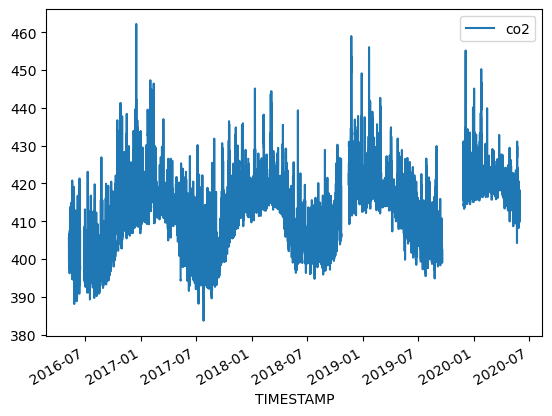

In [11]:
#Plot CO2 time series:
dobj.data.plot(x='TIMESTAMP', y='co2')

<br>

### 4.2. Use station metadata to add title and labels to the plot
The plot will be much more pleasing and useful if we add a title and a  y-axis label. Using Python’s ```+``` operator, we will concatenate strings of metadata items to produce the text for the plot's title.

<AxesSubplot: title={'center': 'ICOS ATC CO2 Release (Gartow, 341.0m)'}, xlabel='TIMESTAMP', ylabel='[µmol mol-1]'>

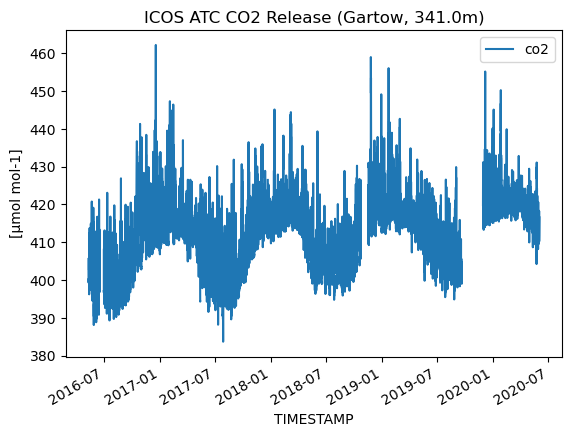

In [42]:
#Label for the data
label_of_data = dobj.meta['specification']['self']['label']

#Name of station. Here it is relevant to mention that the dictionary dobj.station is 
#a shortname for dobj.meta['specificInfo']['acquisition']['station'] 
station_name = dobj.station['org']['name']  

sampling_height = str(dobj.meta['specificInfo']['acquisition']['samplingHeight'])

# title
plot_title=label_of_data + ' (' + station_name + ', ' + sampling_height + 'm)'

# unit
dobj.variables.set_index('name', inplace=True)
#y_unit = dobj.variables.loc['co2']['unit']
y_unit = dobj.variables.loc[dobj.variables['name']=='co2']['unit']

#Use station metadata to add a title & an y-axis label to the plot:
dobj.data.plot(x='TIMESTAMP', y='co2',
               title=plot_title,
               ylabel=y_unit)

<br>

### 4.3. Change the size of the plot
By default, the plots are quite small and compact. Especially when displaying long time series, it can be very useful to make the plot larger, using the figsize parameter.

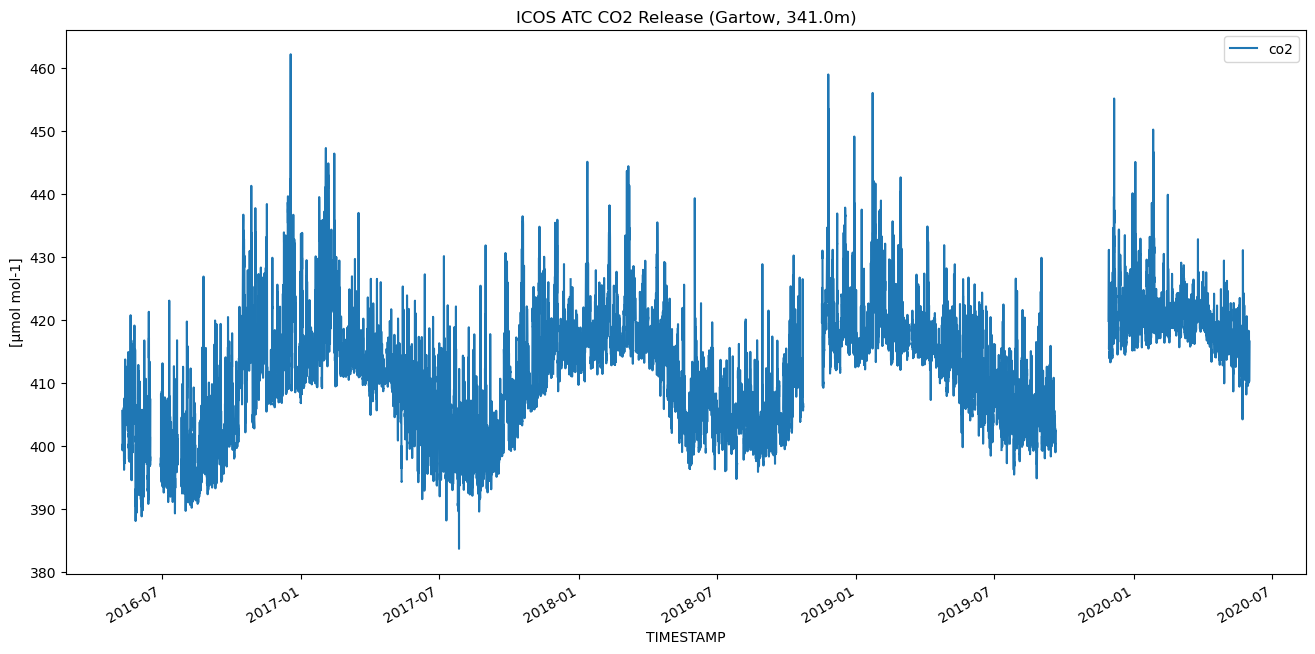

In [43]:
#Change the size of the plot:
x = dobj.data.plot(x='TIMESTAMP', y='co2', figsize=(16,8),
               title=plot_title,
               ylabel=y_unit)

<br>

### 4.4. Add citation
In order to be *FAIR*, we need to properly cite the data in our plot. Every data object includes an attribute with the corresponding citation string.

In [44]:
#Add data citation to your plot:
dobj.citation

'Kubistin, D., Plaß-Dülmer, C., Arnold, S., Lindauer, M., Müller-Williams, J., Schumacher, M. (2020). ICOS ATC CO2 Release, Gartow (341.0 m), 2016-05-10–2020-05-31, ICOS RI, https://hdl.handle.net/11676/IM7PJYcuhiBpHtvEVuLhVk2M'

<br>

### 4.5. Interactive plot - using ICOS tools
Finally, by setting up interactive visualizations you allow for eye-catching and interesting ways for end users to investigate and explore your data and metadata. This example uses the Bokeh visualization library.

In [45]:
#Call function to get plot object:
p = plot_icos_single_station_binary(dobj, 'co2', glyph='line', color='#0F0C08') #line/point

#Show interactive plot:
show(p)

<div style="text-align: right"><a href="#intro">Back to top</a></div>
<a id='data_analysis'></a>
<br>
<br>

## 5. Analyzing observations
The next code-cells show how to get summarized statistics over the content of a data frame as well as how to produce some aggregated statistics (e.g. monthly means & monthly standard deviation) using some Python pandas built-in functions.
<br>

### 5.1. View summarized statistics
Use the Python pandas built-in method ```describe()```, to view summarized statistics for a column of your choice (e.g. co2)

In [46]:
#View summarized statistics for co2 observations:
dobj.data.co2.describe()

count    31710.000000
mean       411.826141
std          9.071000
min        383.690002
25%        404.653992
50%        412.827515
75%        418.166992
max        462.205994
Name: co2, dtype: float64

<br>

### 5.2. Set time as index
By default pandas dataframes have a numeric index. When it comes to processing time series of data, several Python pandas built-in functions require the dataframe to have time as index. The code-cell below shows how you can select a column with time information as index.

In [47]:
#Set time as index:
co2_df = dobj.data.set_index('TIMESTAMP')

#Show data frame (5 first rows):
co2_df.head(5)

,Flag,NbPoints,Stdev,co2
TIMESTAMP,,,,
2016-05-10 00:00:00,N,0,-9.99,NaN
2016-05-10 01:00:00,N,0,-9.99,NaN
2016-05-10 02:00:00,N,0,-9.99,NaN
2016-05-10 03:00:00,N,0,-9.99,NaN
2016-05-10 04:00:00,N,0,-9.99,NaN


<br>

### 5.3. Calculate monthly means
Use the Python pandas built-in method ```resample()```, with ```'M'``` as an input parameter, to aggregate the values in your selected data frame column per month. Then use the Python pandas built-in method ```mean()``` to calculate the monthly mean of these values. By adding ```dropna()``` built-in method, you instruct the program to disregard NaN-values. After you have produced the aggregated monthly values, assign them to the middle of the month using the built-in functions ```offsets.MonthBegin()``` and ```to_offset()```.

In [48]:
#Calculate montly mean:
co2_monthly_mean = co2_df.co2.resample('M').mean().dropna()

#Assign monthly mean value to mid of month:
co2_monthly_mean.index = co2_monthly_mean.index - pd.offsets.MonthBegin(1) + to_offset(pd.Timedelta(14, 'd'))

<br>

### 5.4. Calculate monthly standard deviation
Use the Python pandas built-in method ```resample()```, with ```'M'``` as an input parameter, to aggregate the values in your selected data frame column per month. Then use the Python pandas built-in method ```std()``` to calculate the monthly standard deviation of these values. By adding ```dropna()``` built-in method, you instruct the program to disregard NaN-values.

In [49]:
#Calculate standard deviation per month:
myStation_monthly_std = co2_df.co2.resample('M').std().dropna()

#Assign standard deviation value to mid of month:
myStation_monthly_std.index = myStation_monthly_std.index - pd.offsets.MonthBegin(1) + to_offset(pd.Timedelta(14, 'd'))

<br>

### 5.5 Plot monthly means & standard deviation

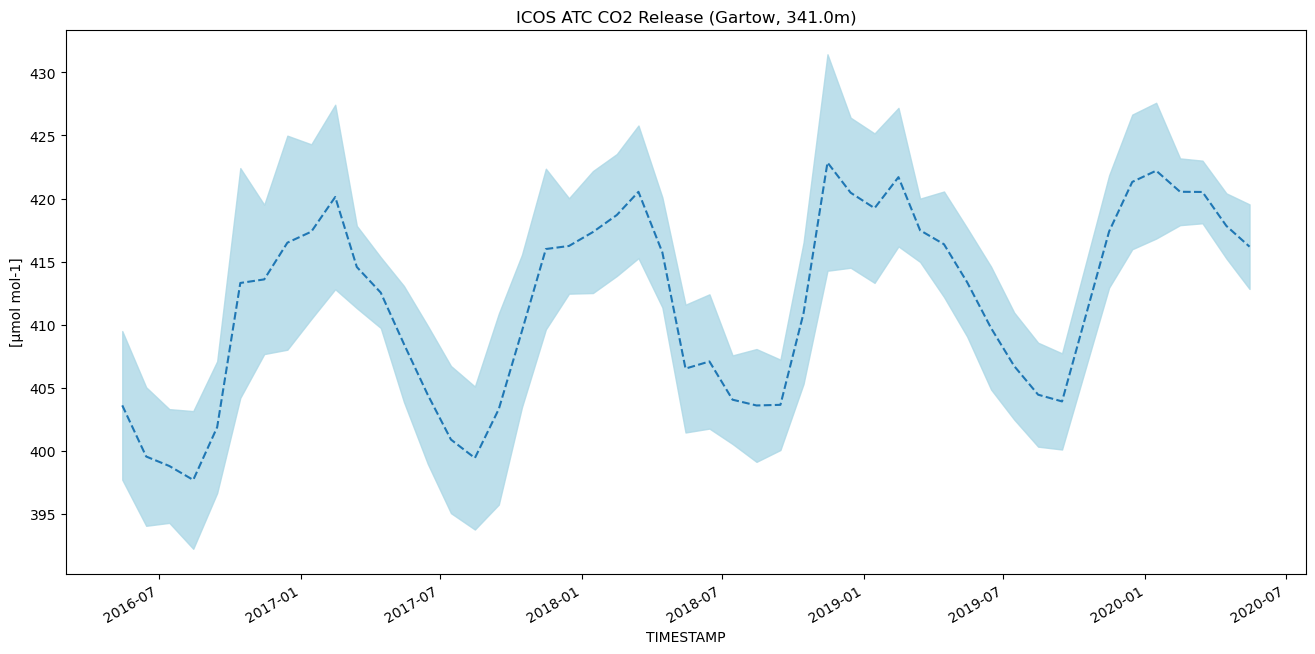

In [50]:
#Plot monthly means:
co2_plot = co2_monthly_mean.plot(kind='line',figsize=(16,8),linestyle = '--',
                                 title=plot_title,
                                 ylabel=y_unit)

#Add standard deviation info to plot:
co2_plot.fill_between(co2_monthly_mean.index,
                      co2_monthly_mean-myStation_monthly_std,
                      co2_monthly_mean+myStation_monthly_std,
                      color='lightblue', alpha=0.8)

<div style="text-align: right"><a href="#intro">Back to top</a></div>
<a id='model_output'></a>
<br>
<br>

## 6. Accessing model output
Now we are going to access and visualize CO$_2$ concentrations calculated using the STILT model, for the same station and time period that we used above to look at observations, with the goal to compare the two time series.

### 6.1. Access STILT model output
First we need to specify the "station" that the STILT calculations were done for. In this example, we picked the station of Gartow with an inlet height of 344 meters (i.e. meters above ground level where the measuring instrument is installed at). The corresponding STILT station ID is *GAT344* and we use the function ```stiltstation.get()``` to create a ```stiltobject```.


In [21]:
#Create STILT-object:
station = 'GAT344'
sobj = stiltstation.get(id = station)

Using the STILT-object we can retrieve the timeseries using the function ```get_ts()```.

In [22]:
stilt_df = sobj.get_ts('2016-05-10','2020-05-31')
stilt_df

,isodate,co2.stilt,co2.bio,co2.fuel,co2.cement,co2.non_fuel,co2.background
date,,,,,,,
2016-05-10 00:00:00,1.462838e+09,400.950260,-6.368785,2.288308,0.012727,0.130366,404.887645
2016-05-10 03:00:00,1.462849e+09,401.491968,-6.181861,2.683157,0.033783,0.151760,404.805129
2016-05-10 06:00:00,1.462860e+09,403.920763,-4.530811,2.210455,0.156168,0.095711,405.989241
2016-05-10 09:00:00,1.462871e+09,401.315834,-8.810168,2.587299,0.078620,0.189646,407.270438
2016-05-10 12:00:00,1.462882e+09,402.517228,-7.415818,2.150953,0.108990,0.079662,407.593441
...,...,...,...,...,...,...,...
2020-05-31 09:00:00,1.590916e+09,414.044810,-3.592070,0.838148,0.010324,0.010078,416.778329
2020-05-31 12:00:00,1.590926e+09,411.819774,-5.598360,0.567326,0.017300,0.014068,416.819441
2020-05-31 15:00:00,1.590937e+09,410.998573,-5.948853,0.304445,0.011702,0.011557,416.619722


<br>

### 6.2. Plot STILT model output (time series)
Let’s create a simple plot, to get a quick impression of the time series:


<AxesSubplot: title={'center': 'STILT CO2 time series (GAT344)'}, xlabel='date', ylabel='CO2 (ppm)'>

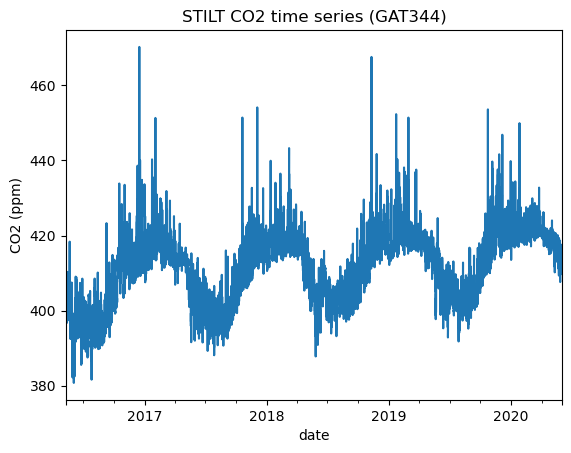

In [23]:
stilt_df['co2.stilt'].plot(title='STILT CO2 time series ('+station+')',
                        ylabel='CO2 (ppm)')

<div style="text-align: right"><a href="#intro">Back to top</a></div>
<a id='model_output_vs_observations'></a>
<br>
<br>

## 7. Compare model output to observations
In this part, we will compare the STILT model output to real world observations (i.e. the ICOS observed CO$_2$-concentration dataset we worked with above), in order to determine how well the model performed for the selected station.

<br>

### 7.1. Plot model output time series and observation time series in same plot
Our first step will be to visually inspect how well the model output fits the real observations. We will do this by plotting the data sets in the same plot.

In [24]:
ax = dobj.data.plot(x='TIMESTAMP', y='co2', figsize=(16,8),
                    title=plot_title,
                    ylabel=y_unit)

stilt_df.plot(y='co2.stilt', ax=ax, title=plot_title + ' and STILT CO2 time series ('+station+')')

NameError: name 'y_unit' is not defined

<br>

### 7.2. Calculate and plot the difference between model output & observations 
It is important to quantify the difference between the model output and the real observations. Even more important is to identify the date and time the largest deviations are observed, in order to determine the underlying reason behind this behaviour.

In this part, we will calculate the difference between the two data sets by subtracting the values of one from the other. Before we move on to do this, we need to make sure that the data sets are harmonized (i.e. they have the same *units* and *temporal resolution*). The units are the same, but ICOS observations have an hourly temporal resolutions while the STILT model output has a 3-hourly temporal resolution.   

#### 7.2.1. Harmonize datasets
One way of harmonizing ICOS observations to 3-hourly intervals is to filter the ICOS observation data frame to only include values for the same time steps that the STILT model output provides results for.

In [25]:
#Select co2 observations in 3-hourly intervals:
co2_3h_df = co2_df['co2'].loc[(co2_df['co2'].index.hour==0) |
                              (co2_df['co2'].index.hour==3) |
                              (co2_df['co2'].index.hour==6) |
                              (co2_df['co2'].index.hour==9) |
                              (co2_df['co2'].index.hour==12) |
                              (co2_df['co2'].index.hour==15) |
                              (co2_df['co2'].index.hour==18) |
                              (co2_df['co2'].index.hour==21)]

#Show the first rows of the series:
co2_3h_df.head()

TIMESTAMP
2016-05-10 00:00:00           NaN
2016-05-10 03:00:00           NaN
2016-05-10 06:00:00           NaN
2016-05-10 09:00:00    402.226013
2016-05-10 12:00:00    402.458008
Name: co2, dtype: float32

#### 7.2.2. Calculate difference
Now that the datasets are harmonized, you can subtract the simulated values from the observed values.

In [26]:
#Calculate diff:
diff = co2_3h_df - stilt_df['co2.stilt']

#Show output:
diff

2016-05-10 00:00:00         NaN
2016-05-10 03:00:00         NaN
2016-05-10 06:00:00         NaN
2016-05-10 09:00:00    0.910179
2016-05-10 12:00:00   -0.059220
                         ...   
2020-05-31 09:00:00   -2.211802
2020-05-31 12:00:00   -1.213787
2020-05-31 15:00:00    1.107414
2020-05-31 18:00:00   -0.977259
2020-05-31 21:00:00   -0.537880
Length: 11864, dtype: float64

#### 7.2.3. Alternative approach
Just as an example we include an alternative way of to calculate the difference.

In [27]:
#Calculate diff_alternative:
diff_alternative = co2_df['co2'] - stilt_df['co2.stilt']

#Show output:
diff_alternative

2016-05-10 00:00:00        NaN
2016-05-10 01:00:00        NaN
2016-05-10 02:00:00        NaN
2016-05-10 03:00:00        NaN
2016-05-10 04:00:00        NaN
                        ...   
2020-05-31 19:00:00        NaN
2020-05-31 20:00:00        NaN
2020-05-31 21:00:00   -0.53788
2020-05-31 22:00:00        NaN
2020-05-31 23:00:00        NaN
Length: 35328, dtype: float64

Here we got many *NaN*-values (Not a Number), which we can remove.

In [28]:
diff_alternative.dropna(inplace=True)
diff_alternative

2016-05-10 09:00:00    0.910179
2016-05-10 12:00:00   -0.059220
2016-05-10 15:00:00   -1.414642
2016-05-10 18:00:00    0.396567
2016-05-12 00:00:00    1.742824
                         ...   
2020-05-31 09:00:00   -2.211802
2020-05-31 12:00:00   -1.213787
2020-05-31 15:00:00    1.107414
2020-05-31 18:00:00   -0.977259
2020-05-31 21:00:00   -0.537880
Length: 10591, dtype: float64

#### 7.2.4. Filter difference by time
If you are particularly interested in inspecting the difference between simulated and observed values over a specific time period, you can filter the result to only contain values for that time period using the code below.

In [29]:
#Filter by time:
#diff = diff.loc[pd.to_datetime('2018-1-1'):pd.to_datetime('2019-1-1')]

#Show result:
#diff

<br>

#### 7.2.5. Plot difference 

##### 7.2.5.1. Plot difference (static plot)

<AxesSubplot: title={'center': 'Difference between ICOS observations & STILT model output'}, xlabel='date', ylabel='ppm'>

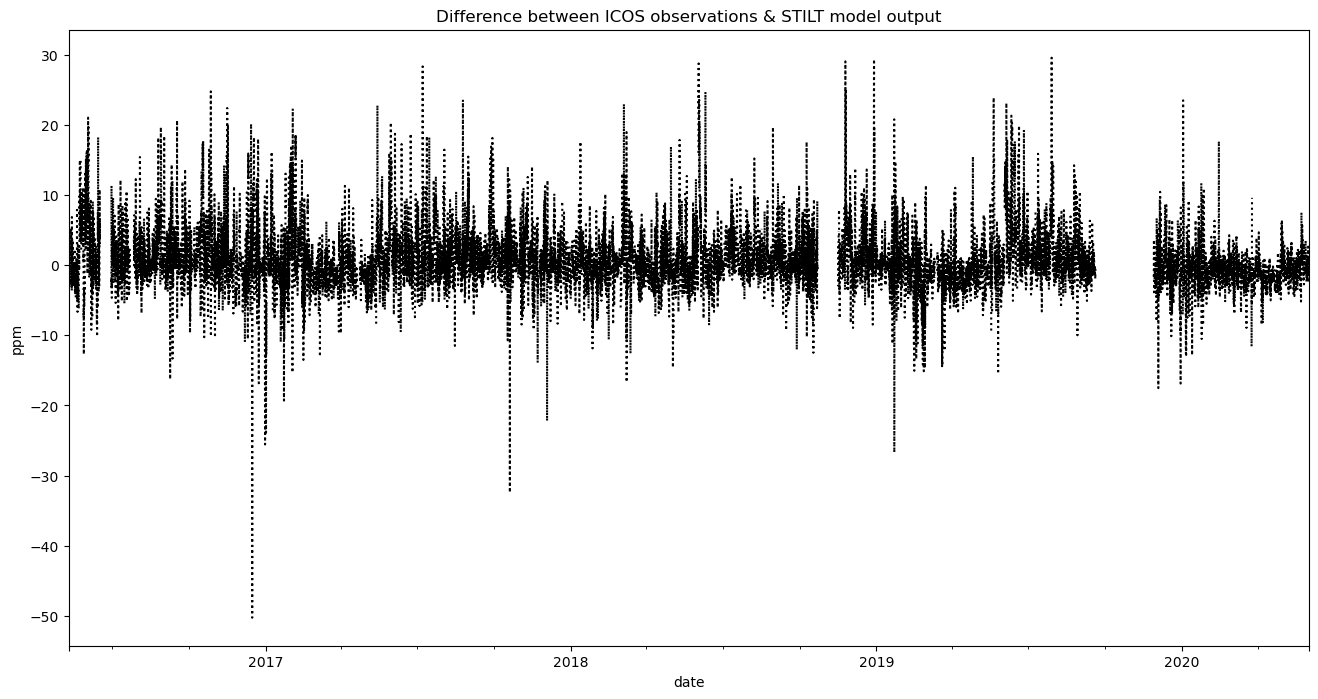

In [30]:
#Plot diff (static plot):
diff.plot(figsize=(16,8), kind='line', linestyle=':', color='black',
          title = 'Difference between ICOS observations & STILT model output',
          xlabel='date', ylabel='ppm')

##### 7.2.5.2. Plot diff (interactive plot)

In [31]:
#Call function to get plot object:
p2 = plot_ps_timeseries(diff, 'line',
                        title = 'Difference between ICOS observations & STILT model output',
                        xlabel='Time (UTC)', ylabel='ppm', color='#0F0C08')

#Show interactive plot:
show(p2)

<font color='darkblue'>

**Question:** Is this a good fit? What do you think? <br><br></font>
As a first step towards answering this question, you may want to use Python pandas built-in method ```describe()``` for obtaining descriptive statistics over the dataset.

In [32]:
#Get descriptive statistics over the difference:
diff.describe()

count    10591.000000
mean         0.767350
std          4.272882
min        -50.255797
25%         -1.488665
50%          0.097320
75%          2.402477
max         29.561323
dtype: float64

Another way to test the goodness of fit between the STILT model output and the real observations, is to compute the *correlation* between the two datasets. Python pandas library includes a built-in method [```corr()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html) that computes the correlation between two datasets.

In [33]:
co2_3h_df.corr(stilt_df['co2.stilt'], method='pearson')

0.8898910468685387

In [34]:
#Attention! Make sure that you have performed the analysis over data from the same station:
print('ICOS station:  ', dobj.station['id'],str(dobj.meta['specificInfo']['acquisition']['samplingHeight']))
print('STILT station: ', sobj.id) 

ICOS station:   GAT 341.0
STILT station:  GAT344


<br>
<br>

If you are interested in continue exploring other methods of data processing and visualization, please have a look at the Jupyter Notebooks stored under the *icos_jupyter_notebooks* folder on https://exploredata.icos-cp.eu.

<br>
<br>

<div style="text-align: right"><a href="#intro">Back to top</a></div>
<br>
<br>

**Student name:** Karolina Pantazatou <br>
**Affiliation:** ICOS Carbon Portal